In [1]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir("C:\\Users\\sriva\\Downloads\\TMC")

In [3]:
gbc_patients = pd.read_excel("sem2_working_gbc_cleaned.xlsx")

In [4]:
gbc_patients.head()

,Thyroidism,HTN,Family_cancer_history,ECOG_final,Gall_stone_final,Pathology,Tumour_grade_final,Cancer_presentation_final,Tumour_stage_final,Mets_site_final,...,AGE_random,BMI_DETAILS_random,BILIRUBIN CONJUGATED_random,BILIRUBIN UNCONJUGATED_random,BILIRUBIN TOTAL_random,AST - SGOT_random,ALT - SGPT_random,ALK PHOS [ALP]_random,GAMMA GT_random,ALBUMIN_random
0,No,Yes,No,1,Yes,Adenocarcinoma,Grade 3,Incidental,Stage IV,Not applicable,...,60,24.93,0.0,0.5,0.5,23,28,147,21,4.7
1,No,No,No,1,Unknown,Adenocarcinoma,Grade X,Metastatic,Stage IV,"Liver or Liver+others(lungs,bones)",...,58,22.55,0.0,1.1,0.4,348,78,206,481,3.2
2,No,Yes,No,2,Yes,Adenocarcinoma,Grade X,Metastatic,Stage IV,"Liver or Liver+others(lungs,bones)",...,62,0.00,0.0,0.2,0.7,428,266,676,99,3.8
3,No,Yes,Unknown,1,Yes,Others,Grade 2,Incidental,Stage II,Not applicable,...,62,20.22,0.0,1.0,1.0,36,31,108,21,4.6
4,Hypothyroidism,Yes,Unknown,Unknown,Yes,Adenocarcinoma,Grade X,Locally advanced,Unknown,Not applicable,...,77,24.15,12.1,2.0,20.5,286,130,492,209,2.6


In [5]:
gbc_patients.shape

(485, 25)

In [6]:
gbc_patients.isnull().sum()

Thyroidism                       0
HTN                              0
Family_cancer_history            0
ECOG_final                       0
Gall_stone_final                 0
Pathology                        0
Tumour_grade_final               0
Cancer_presentation_final        0
Tumour_stage_final               0
Mets_site_final                  0
Surgery_final                    0
Treatment_final                  0
Status                           0
GENDER                           0
Diabetes_final                   0
AGE_random                       0
BMI_DETAILS_random               0
BILIRUBIN CONJUGATED_random      0
BILIRUBIN UNCONJUGATED_random    0
BILIRUBIN TOTAL_random           0
AST - SGOT_random                0
ALT - SGPT_random                0
ALK PHOS [ALP]_random            0
GAMMA GT_random                  0
ALBUMIN_random                   0
dtype: int64

In [38]:
gbc_patients["Status"].value_counts()

Dead     425
Alive     60
Name: Status, dtype: int64

In [39]:
# label = 'ECOG_final', 'Tumour_grade_final' , 'Tumour_stage_final', 'Treatment_final'
# OHE = 'Thyroidism', 'HTN', 'Family_cancer_history', 'Gall_stone_final', 'Pathology', 'Cancer_presentation_final', 'Mets_site_final', 'Surgery_final','GENDER','Diabetes_final'  

In [40]:
df_work= pd.read_excel("final_encoded_gbc_dataset.xlsx")

In [41]:
df_work.head()

,ECOG_final,Tumour_grade_final,Tumour_stage_final,Treatment_final,Status,AGE_random,BMI_DETAILS_random,BILIRUBIN_CONJUGATED_random,BILIRUBIN_UNCONJUGATED_random,BILIRUBIN_TOTAL_random,...,Mets_site_final_Not_applicable,Mets_site_final_Others,Mets_site_final_Peritoneum&Omentum,Surgery_final_Partial,Surgery_final_Radical,Surgery_final_Simple,Surgery_final_Unknown,GENDER_MALE,Diabetes_final_Unknown,Diabetes_final_Yes
0,1,2,3,0,0,60,24.93,0.0,0.5,0.5,...,1,0,0,0,1,0,0,0,0,1
1,1,4,3,1,0,58,22.55,0.0,1.1,0.4,...,0,0,0,0,0,0,0,0,0,0
2,2,4,3,1,0,62,0.00,0.0,0.2,0.7,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,62,20.22,0.0,1.0,1.0,...,1,0,0,0,0,1,0,1,0,1
4,5,4,4,2,0,77,24.15,12.1,2.0,20.5,...,1,0,0,0,0,0,0,0,1,0


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm

In [43]:
## MODEL TRAINING ON ENCODED DATA - SINGLE MODEL ANALYSIS (Without Standardization) After Treating Data Imbalancy

In [94]:
from imblearn.over_sampling import SMOTE

# Splitting the dataset into features and target
X = df_work.drop('Status', axis=1)
y = df_work['Status']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the classes
#smote = SMOTE(sampling_strategy=1, random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)



In [95]:
y_train_resampled.value_counts()

1    306
0    300
Name: Status, dtype: int64

[LightGBM] [Info] Number of positive: 306, number of negative: 300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504950 -> initscore=0.019803
[LightGBM] [Info] Start training from score 0.019803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Figure size 1000x800 with 0 Axes>

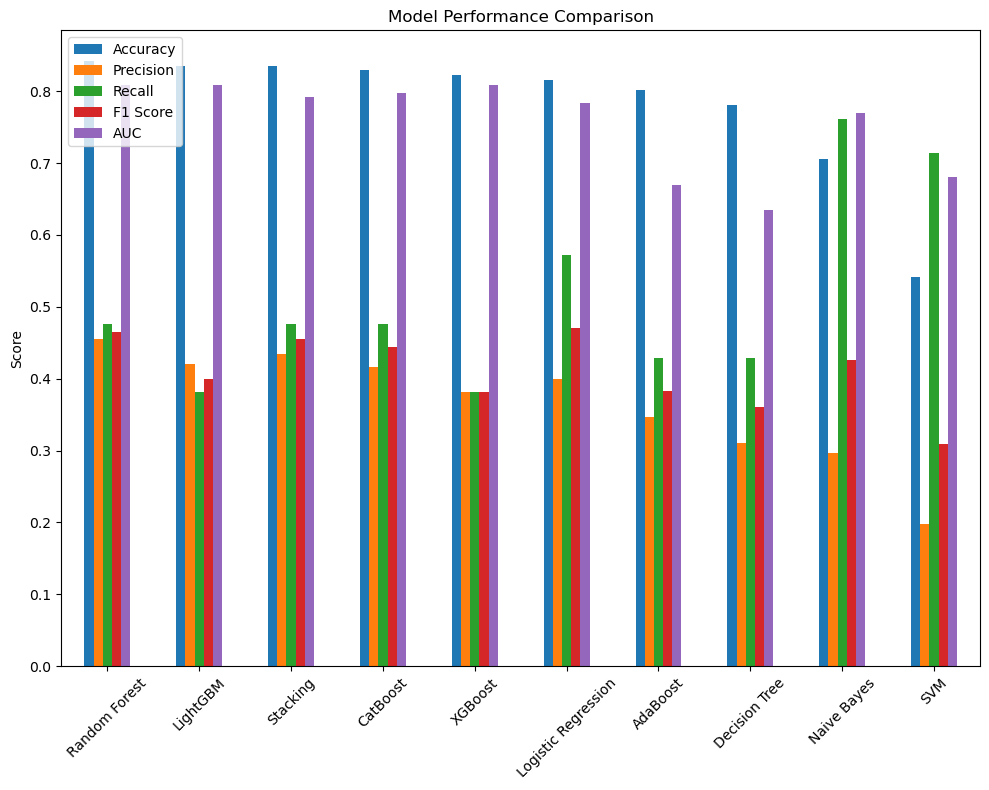

Model evaluation results:
                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.815068   0.400000  0.571429  0.470588  0.783619
Random Forest        0.842466   0.454545  0.476190  0.465116  0.808190
SVM                  0.541096   0.197368  0.714286  0.309278  0.680762
Naive Bayes          0.705479   0.296296  0.761905  0.426667  0.769143
Decision Tree        0.780822   0.310345  0.428571  0.360000  0.634286
AdaBoost             0.801370   0.346154  0.428571  0.382979  0.670095
CatBoost             0.828767   0.416667  0.476190  0.444444  0.797714
XGBoost              0.821918   0.380952  0.380952  0.380952  0.808000
LightGBM             0.835616   0.421053  0.380952  0.400000  0.808381
Stacking             0.835616   0.434783  0.476190  0.454545  0.792381


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    #'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
}

# Adding Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('lr', LogisticRegression())
]
models['Stacking'] = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Define the cost matrix as a 1D array
cost_matrix = np.array([1, 1, 5, 0])  # Flattened version of the original 2x2 matrix

# Train each model with cost-sensitive learning
for name, model in models.items():
    if name == 'Stacking':
        model.fit(X_train_resampled, y_train_resampled)  # Stacking does not support sample_weight
    else:
        model.fit(X_train_resampled, y_train_resampled, sample_weight=cost_matrix[y_train_resampled])


# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Evaluating each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)


[LightGBM] [Info] Number of positive: 47, number of negative: 341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121134 -> initscore=-1.981735
[LightGBM] [Info] Start training from score -1.981735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Figure size 1000x800 with 0 Axes>

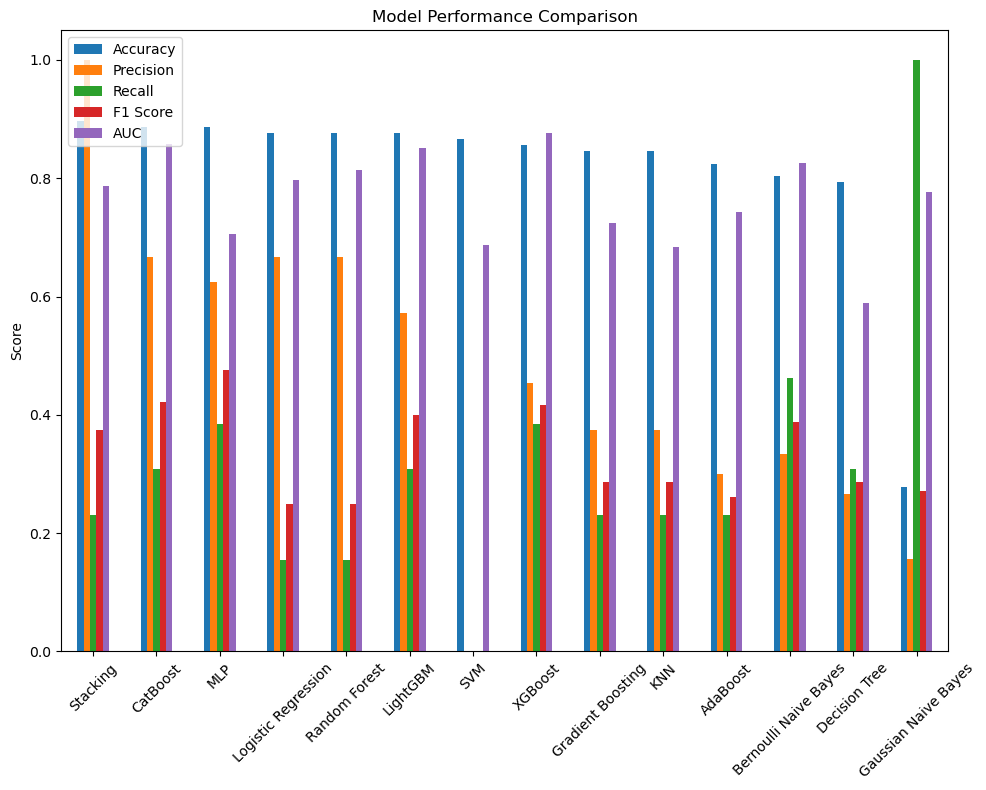

Model evaluation results:
                       Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression    0.876289   0.666667  0.153846  0.250000  0.797619
Random Forest          0.876289   0.666667  0.153846  0.250000  0.813187
AdaBoost               0.824742   0.300000  0.230769  0.260870  0.742674
Gradient Boosting      0.845361   0.375000  0.230769  0.285714  0.724359
SVM                    0.865979   0.000000  0.000000  0.000000  0.687729
KNN                    0.845361   0.375000  0.230769  0.285714  0.684524
Gaussian Naive Bayes   0.278351   0.156627  1.000000  0.270833  0.777473
Bernoulli Naive Bayes  0.804124   0.333333  0.461538  0.387097  0.826007
Decision Tree          0.793814   0.266667  0.307692  0.285714  0.588370
CatBoost               0.886598   0.666667  0.307692  0.421053  0.857143
XGBoost                0.855670   0.454545  0.384615  0.416667  0.876374
LightGBM               0.876289   0.571429  0.307692  0.400000  0.850733
MLP                    0.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Selecting the dataframe
df = pd.read_excel("final_encoded_gbc_dataset.xlsx")

# Adjusting the column names according to the dataset
numerical_cols = ['AGE_random', 'BMI_DETAILS_random', 'BILIRUBIN_CONJUGATED_random', 
                  'BILIRUBIN_UNCONJUGATED_random', 'BILIRUBIN_TOTAL_random', 'AST_SGOT_random', 
                  'ALT_SGPT_random', 'ALK_PHOS_ALP_random', 'GAMMA_GT_random', 'ALBUMIN_random']

# Splitting the data into features and target
X = df.drop('Status', axis=1)
y = df['Status']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    #'Linear SVM': LinearSVC(),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

# Adding Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
]
models['Stacking'] = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Evaluating each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)
